In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from  itertools import cycle,islice
from  pandas.plotting import parallel_coordinates
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/Users/lenovo/Desktop/datasets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.shape

(150, 6)

In [21]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [24]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [22]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Visulation

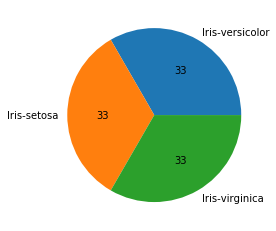

In [37]:
plt.pie(df['Species'].value_counts(), labels = df['Species'].value_counts().index,
       autopct="%1.f")
plt.show()

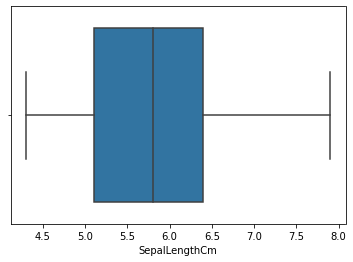

In [39]:
sns.boxplot(df['SepalLengthCm'])
plt.show()

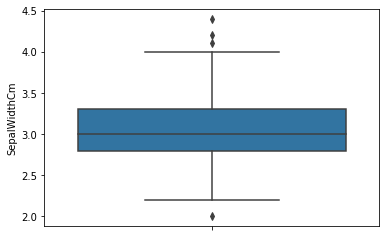

In [40]:
sns.boxplot(y = df['SepalWidthCm'])
plt.show()

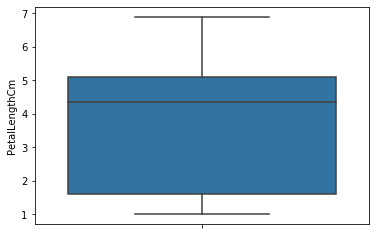

In [45]:
sns.boxplot(y = df['PetalLengthCm'])
plt.show()

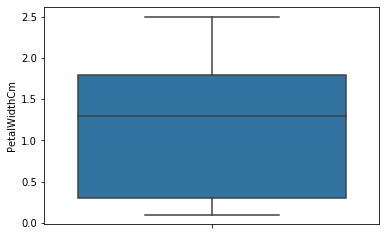

In [44]:
sns.boxplot(y = df['PetalWidthCm'])
plt.show()

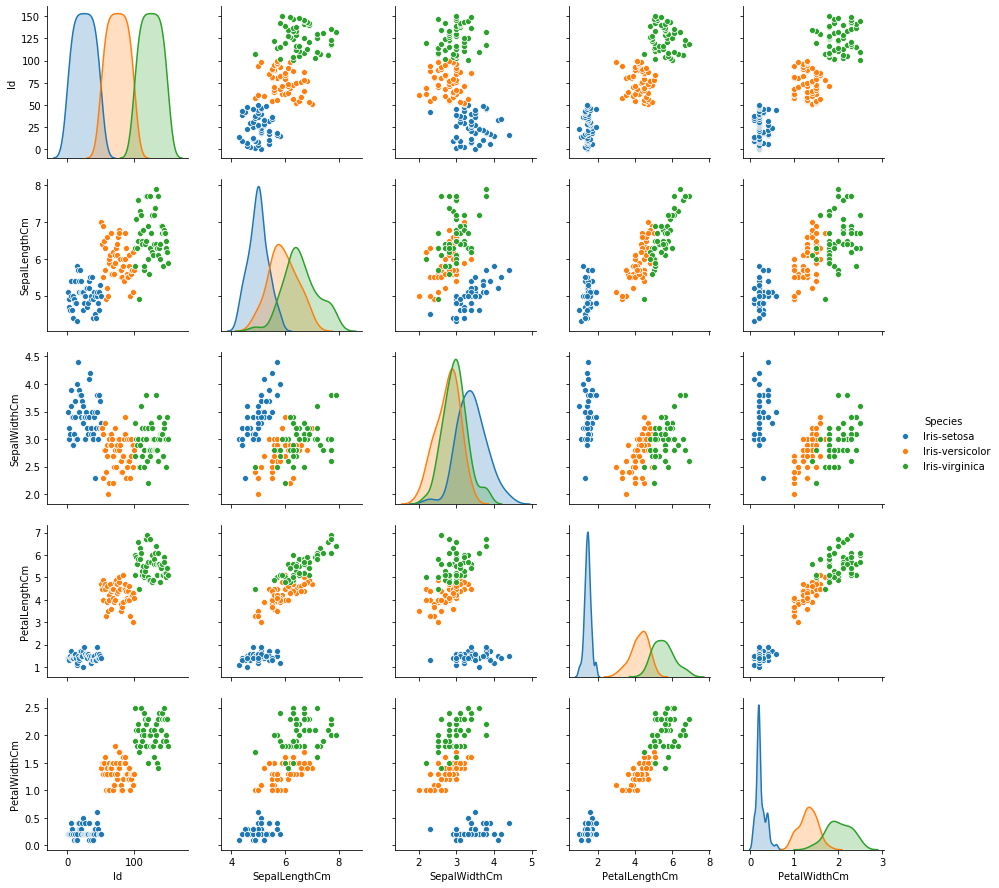

In [46]:
sns.pairplot(df, hue = 'Species')

In [48]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


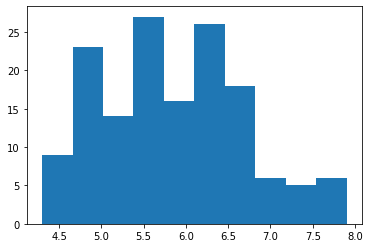

In [52]:
plt.hist(df['SepalLengthCm'], bins = 10)
plt.show()

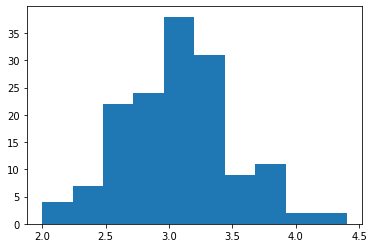

In [53]:
plt.hist(df['SepalWidthCm'], bins = 10)
plt.show()

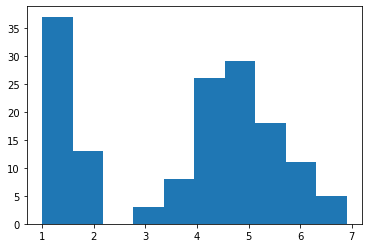

In [54]:
plt.hist(df['PetalLengthCm'], bins = 10)
plt.show()

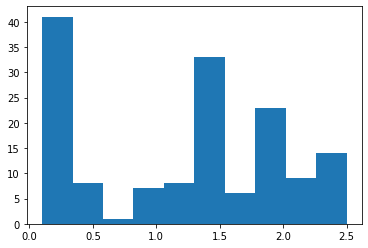

In [55]:
plt.hist(df['PetalWidthCm'], bins = 10)
plt.show()

# ML - Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Id', 'Species'], axis = 1),
                                                    df['Species'],
                                                    test_size = 0.20,
                                                    random_state = 8)

In [6]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
model.score(x_test,y_test)*100

93.33333333333333

In [8]:
model.predict(x_test)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [12]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [13]:
df[74:76]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
75,76,6.6,3.0,4.4,1.4,Iris-versicolor


In [14]:
df.tail(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
t1 = np.array([[5.1, 3.5, 1.4, 0.2]])
t2 = np.array([[6.6, 3.0, 4.4, 1.4]])
t3 = np.array([[6.2, 3.4, 5.4, 2.3]])

In [16]:
print(model.predict(t1))
print(model.predict(t2))
print(model.predict(t3))

['Iris-setosa']
['Iris-versicolor']
['Iris-virginica']


In [17]:
t4 = np.array([[6.2, 3.4, 5.4, 2.3]])
print(model.predict(t4))

['Iris-virginica']


# ML - KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [10]:
features = df.drop(['Id', 'Species'], axis = 1)
target = df['Species']

In [11]:
scale = StandardScaler()
scale.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_features = scale.transform(features)

In [75]:
df2 = pd.DataFrame(scaled_features)
df2.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [13]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size = 0.25,
                                                    random_state = 45)



In [14]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
model.score(x_test,y_test)*100

94.73684210526315

In [84]:
pred = model.predict(x_test)
pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [83]:
model.predict(x_test).reshape(38,1)

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-setosa']], dtyp

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.95        38
      macro avg       0.94      0.96      0.94        38
   weighted avg       0.96      0.95      0.95        38



In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 13]], dtype=int64)

# Support vector machine

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
scaler=StandardScaler()
x=df.drop(['Id', 'Species'],axis=1)
y=df['Species']


scaler.fit(x)
x_transformed=scaler.transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_transformed,y,test_size=0.3)

In [9]:
#SVM
model=SVC()
model.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

print("Train set Accuracy"+str(accuracy_score(y_train_pred,y_train)*100))
print("Train set Accuracy"+str(accuracy_score(y_test_pred,y_test)*100))

Train set Accuracy98.09523809523809
Train set Accuracy93.33333333333333


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_pred,y_test)

array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 13]], dtype=int64)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.88      0.90        16
 Iris-virginica       0.87      0.93      0.90        14

      micro avg       0.93      0.93      0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



# 28 April 2021

In [2]:
df = pd.read_csv('C:/Users/lenovo/Desktop/datasets/minute_weather.csv')
df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [3]:
df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [4]:
df.shape

(1587257, 13)

In [5]:
df.isnull().any()

rowID                 False
hpwren_timestamp      False
air_pressure          False
air_temp              False
avg_wind_direction     True
avg_wind_speed         True
max_wind_direction     True
max_wind_speed         True
min_wind_direction     True
min_wind_speed         True
rain_accumulation      True
rain_duration          True
relative_humidity     False
dtype: bool

In [6]:
df.isnull().sum()

rowID                   0
hpwren_timestamp        0
air_pressure            0
air_temp                0
avg_wind_direction    433
avg_wind_speed        433
max_wind_direction    433
max_wind_speed        433
min_wind_direction    433
min_wind_speed        433
rain_accumulation       1
rain_duration           1
relative_humidity       0
dtype: int64

In [7]:
df.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587257e+06,1.587257e+06,1.587257e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.587256e+06,1.587256e+06,1.587257e+06
mean,7.936280e+05,9.168301e+02,6.185144e+01,1.619654e+02,2.774272e+00,1.634030e+02,3.399813e+00,1.668264e+02,2.133130e+00,1.854836e-03,5.361460e-01,4.760837e+01
std,4.582018e+05,3.051593e+00,1.183362e+01,9.520812e+01,2.060758e+00,9.236723e+01,2.423167e+00,9.746275e+01,1.745345e+00,9.609716e-01,8.114766e+01,2.621454e+01
min,0.000000e+00,9.050000e+02,3.164000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01
25%,3.968140e+05,9.148000e+02,5.270000e+01,6.200000e+01,1.300000e+00,6.800000e+01,1.600000e+00,7.700000e+01,8.000000e-01,0.000000e+00,0.000000e+00,2.470000e+01
50%,7.936280e+05,9.167000e+02,6.224000e+01,1.820000e+02,2.200000e+00,1.870000e+02,2.700000e+00,1.800000e+02,1.600000e+00,0.000000e+00,0.000000e+00,4.470000e+01
75%,1.190442e+06,9.187000e+02,7.088000e+01,2.170000e+02,3.800000e+00,2.230000e+02,4.600000e+00,2.120000e+02,3.000000e+00,0.000000e+00,0.000000e+00,6.800000e+01
max,1.587256e+06,9.295000e+02,9.950000e+01,3.590000e+02,3.230000e+01,3.590000e+02,3.600000e+01,3.590000e+02,3.200000e+01,6.550100e+02,6.330500e+04,9.300000e+01


In [8]:
df.corr()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
rowID,1.000000,-0.055028,0.161705,0.033910,-0.033651,0.040278,-0.036821,0.027521,-0.031184,0.001783,0.000176,-0.027874
air_pressure,-0.055028,1.000000,0.046632,-0.195163,-0.079954,-0.218719,-0.062462,-0.139134,-0.098003,-0.000777,-0.006566,-0.375707
air_temp,0.161705,0.046632,1.000000,-0.016620,-0.208988,-0.046383,-0.208484,0.033342,-0.200032,-0.000609,-0.006268,-0.620232
avg_wind_direction,0.033910,-0.195163,-0.016620,1.000000,-0.031116,0.716316,-0.030637,0.622763,-0.035435,0.000061,0.000898,0.205828
avg_wind_speed,-0.033651,-0.079954,-0.208988,-0.031116,1.000000,0.017618,0.985009,-0.117807,0.970987,0.001759,0.006652,0.061139
max_wind_direction,0.040278,-0.218719,-0.046383,0.716316,0.017618,1.000000,0.017504,0.421684,0.010341,0.000353,0.001653,0.241055
max_wind_speed,-0.036821,-0.062462,-0.208484,-0.030637,0.985009,0.017504,1.000000,-0.112538,0.925881,0.001728,0.007033,0.048773
min_wind_direction,0.027521,-0.139134,0.033342,0.622763,-0.117807,0.421684,-0.112538,1.000000,-0.121161,-0.000339,-0.000453,0.129132
min_wind_speed,-0.031184,-0.098003,-0.200032,-0.035435,0.970987,0.010341,0.925881,-0.121161,1.000000,0.001719,0.005801,0.072226
rain_accumulation,0.001783,-0.000777,-0.000609,0.000061,0.001759,0.000353,0.001728,-0.000339,0.001719,1.000000,0.927017,0.000584


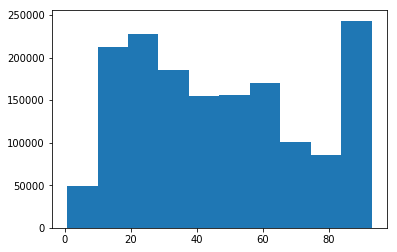

In [9]:
plt.hist(df['relative_humidity'], bins = 10)
plt.show()

In [10]:
#plt.bar(df['air_pressure'],df['relative_humidity'])
#plt.show()

In [11]:
sample_df=df[(df['rowID']%10)==0]
sample_df.shape

(158726, 13)

In [12]:
sample_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [13]:
sample_df[sample_df['rain_accumulation']==0].shape

(157812, 13)

In [14]:
sample_df[sample_df['rain_duration']==0].shape

(157237, 13)

drop all the rows with empty ran_duration and rain_accumulation

In [15]:
del sample_df['rain_accumulation']
del sample_df['rain_duration']

In [16]:
row_before=sample_df.shape[0]
sample_df=sample_df.dropna()
row_after=sample_df.shape[0]


In [17]:
sample_df.shape

(158680, 11)

In [18]:
row_before - row_after

46

In [19]:
sample_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [20]:
features=['air_pressure','air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed','relative_humidity']

In [21]:
select_df=sample_df[features]

In [22]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [23]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
50,912.1,63.68,102.0,1.2,119.0,1.5,51.4
60,912.0,64.04,83.0,0.7,101.0,0.9,51.4
70,911.9,64.22,82.0,2.0,97.0,2.4,62.2
80,911.9,61.70,67.0,3.3,70.0,3.5,71.5
90,911.9,61.34,67.0,3.6,75.0,4.2,72.5


scale the features using StandardScaler

In [24]:
x=StandardScaler().fit_transform(select_df)
x

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

USE K-MEANS CLUSTERING

In [25]:
kmeans=KMeans(n_clusters=12)
model=kmeans.fit(x)
print("model\n",model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


where are centres of 12 clustors we formed?

In [26]:
center=model.cluster_centers_
center

array([[ 1.19004576, -0.25465782, -1.15493046,  2.12248497, -1.05341968,
         2.23920146, -1.13456519],
       [ 0.13275018,  0.84085842,  1.41239265, -0.63816329,  1.67654123,
        -0.58897944, -0.7136764 ],
       [-0.83790214, -1.20126412,  0.37559352,  0.36943687,  0.47406303,
         0.35737854,  1.36262661],
       [ 0.23405125,  0.32061871,  1.8879544 , -0.65181511, -1.55175807,
        -0.57669397, -0.28385048],
       [-0.21041768,  0.63297452,  0.40857781,  0.73366478,  0.51673943,
         0.67179778, -0.15177726],
       [-0.16360596,  0.86341738, -1.31128474, -0.58959006, -1.16711916,
        -0.60487726, -0.6413221 ],
       [ 0.71543586,  0.45013494,  0.28539025, -0.53668283,  0.47260756,
        -0.54292292, -0.76649212],
       [-0.70717121,  0.53327461,  0.17508065, -0.58426628,  0.34474239,
        -0.59768784, -0.10698769],
       [-1.18257335, -0.87036596,  0.44683621,  1.98327763,  0.53831534,
         1.94419717,  0.90875253],
       [ 0.06113923, -0.7889

In [36]:
# function that creates a dataframe with a columns for clustor number


def pd_centers(featuresUsed,center):
    colNames= list(featuresUsed)
    colNames.append('prediction')
    #zip with a col called 'prediction'(index)
    z=[np.append(A,index) for index, A in enumerate(center)]
    
    #convert to pandas dataframe for plotting
    p=pd.DataFrame(z,columns=colNames)
    p['prediction']=p['prediction'].astype(int)
    return p

In [53]:
#function thta creates parallel plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data))) #rhm02
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [54]:
p=pd_centers(features,center)
p

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,1.190046,-0.254658,-1.154930,2.122485,-1.053420,2.239201,-1.134565,0
1,0.132750,0.840858,1.412393,-0.638163,1.676541,-0.588979,-0.713676,1
2,-0.837902,-1.201264,0.375594,0.369437,0.474063,0.357379,1.362627,2
3,0.234051,0.320619,1.887954,-0.651815,-1.551758,-0.576694,-0.283850,3
4,-0.210418,0.632975,0.408578,0.733665,0.516739,0.671798,-0.151777,4
5,-0.163606,0.863417,-1.311285,-0.589590,-1.167119,-0.604877,-0.641322,5
6,0.715436,0.450135,0.285390,-0.536683,0.472608,-0.542923,-0.766492,6
7,-0.707171,0.533275,0.175081,-0.584266,0.344742,-0.597688,-0.106988,7
8,-1.182573,-0.870366,0.446836,1.983278,0.538315,1.944197,0.908753,8
9,0.061139,-0.788919,-1.197303,-0.570779,-1.043318,-0.585363,0.879155,9


DRY DAY

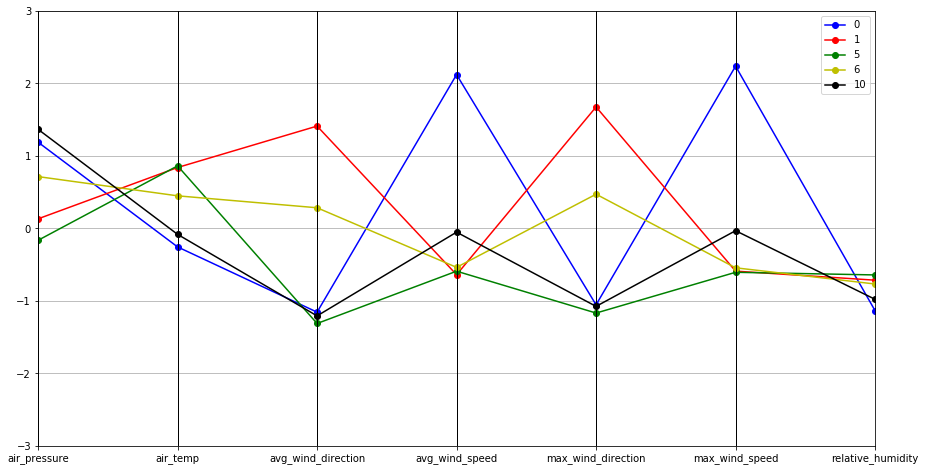

In [55]:
parallel_plot(p[p['relative_humidity']< -0.5])

WARM DAYS

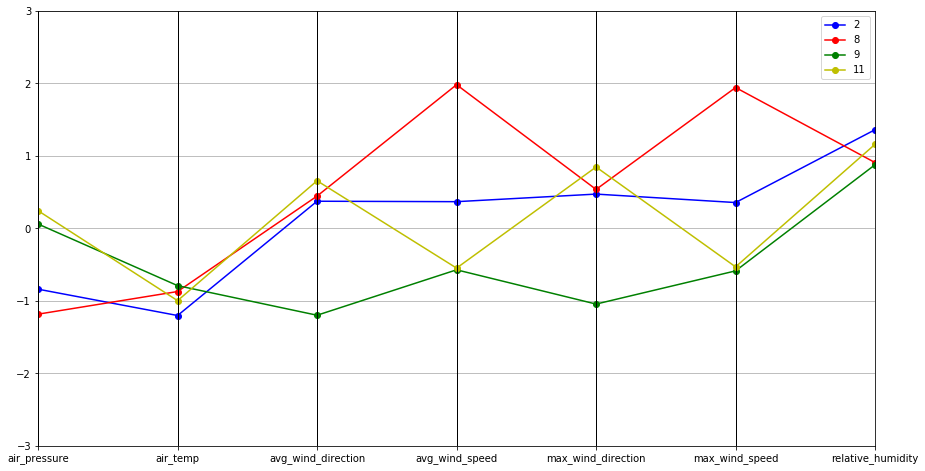

In [56]:
parallel_plot(p[p['air_temp']< -0.5])

Cool Days

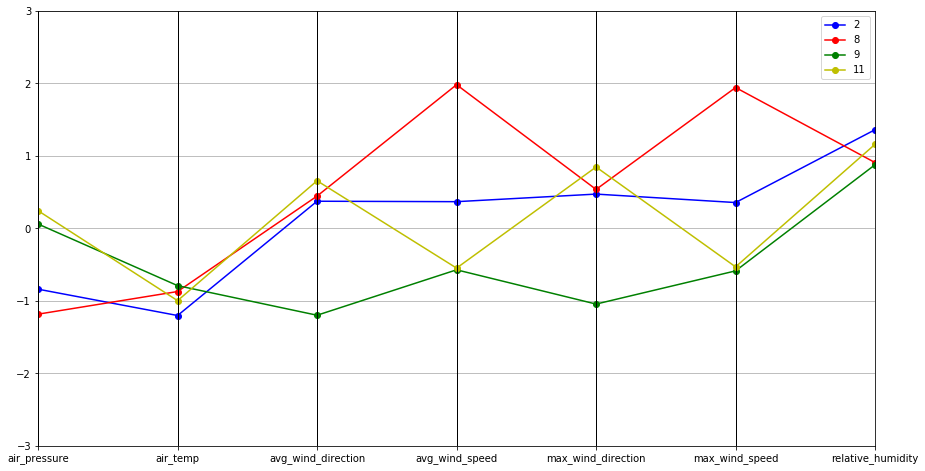

In [57]:
parallel_plot(p[(p['relative_humidity']>-0.5) &(p['air_temp']< -0.5)])

# 29 April 2021

In [67]:
mob_test = pd.read_csv('C:/Users/lenovo/Desktop/datasets/mobiledata/mobile_test.csv')
mob_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [68]:
mob_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [42]:
mt.shape

(1000, 21)

In [43]:
mt.isnull().any()

id               False
battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

In [59]:
# find number of mobile who are dule_sim=1 and not dule_sim=0
dule_sim_count=mt['dual_sim'].value_counts()
dule_sim_count

1    517
0    483
Name: dual_sim, dtype: int64

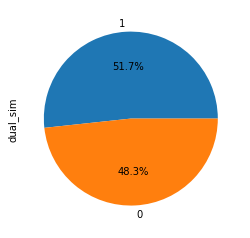

In [60]:
# pie chart 
dule_sim_count.plot.pie(autopct="%.1f%%")

Text(0.5, 1.0, 'Histogram')

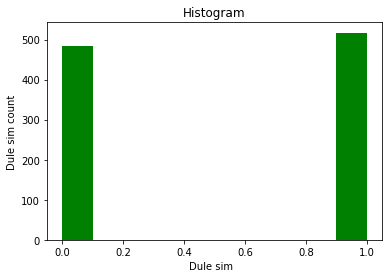

In [65]:
#Graphically representation of dule sim
plt.hist(mt["dual_sim"],10 , density = False, facecolor = 'green')
plt.xlabel('Dule sim  ')
plt.ylabel('Dule sim count')
plt.title('Histogram')

In [10]:
iris = pd.read_csv('C:/Users/lenovo/Desktop/datasets/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
data=iris.drop(['Species'],axis=1)

In [13]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
